# Getting started with Python

If using Google Colab, please go to `File` -> `Save a copy in Drive`

**Date**: October 31st, 2024

**Author**: Sunny Fang, yf2610

_Created as part of the Barnard College Computing Fellows Program, Fall 2024_


By the end of this workshop, students should...
1. Feel comfortable with basic Python syntax
2. Understand how to load and explore datasets
3. Perform simple data analysis tasks relevant to their research

# 0. Setup

In [ ]:
%pip install pandas
%pip install seaborn
%pip install --upgrade matplotlib

In [2]:
# to process data
import pandas as pd

# to plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# for datetime processing
from datetime import datetime

# 1. Intro to Python syntax

### Data types and print statements

In [ ]:
# step 1: define the variables
today_date = "2024-10-31" # you can also try: today_date = datetime.today().strftime('%Y-%m-%d')
temperature = 68

# step 2: format the string
# try running the following: why doesn't this work?
# sentence = "Today is " + today_date + ", and the temperature is " + temperature + "degrees"

# comment the above line out
# let's check the data type of temperature
type(temperature)

In [ ]:
# step 2 continued
# since temperature is an integer, we need to cast "str" type to concatenatethe string
sentence = "Today is " + today_date + ", and the temperature is " + str(temperature) + " degrees"

# step 3: print!
print(sentence)

# alternatively, step 2 and 3 can be combined and rewritten as
# print("Today is " + today_date + ", and the temperature is " + str(temperature) + " degrees")

There are many ways to format a string, below are more examples:
- `'Today is {}, and the temperature is {} degrees'.format(today_date, temperature)`
- `f'Today is {today_date}, and the temperature is {temperature} degrees'`

#### your turn! 

Print out your name, age, and birthday in the format of 
```My name is ___. I am __ years old, and my birthday is ___```

In [ ]:
# TODO: your turn
# print out your name, age, and birthday in the format of...
# My name is ___. I am __ years old, and my birthday is ___
# HINT: define variables: name, age, and birthday
___
___
___

# HINT: how should we format the sentence?
# which variable should we cast the str type on?
# alternatively, what are other ways we can format the string? (see above)
print(___)

### Lists

In [ ]:
# let list1 be a list of numbers from 1 to 10
list1 = list(range(1, 11)) # syntax: range(start, end+1)
print(list1)

# to index from a list, we specify the index
first_item = list1[0]
print(f"The first item of list 1 is {first_item}")

# to find the length of the list, we use the len() function
list1_length = len(list1)
print(f"The length of list 1 is {list1_length}")

# we can update a list simply by assigning a new value at an index
list1[0] = 11
print(f"The updated list 1 is {list1}")

# we can add to a list two different ways
list1 = list1 + [12, 13]
print(f"The updated list 1 is {list1}")

list1 += [14, 15]
print(f"The updated list 1 is {list1}")

### Operators

In [ ]:
# Given x = 3, do the following operations and print the results
x = 3

# Arithmetic: 
# what is x + 2? Store the answer in the variable y
y = x + 2
print(y)

# Assignment: 
# What is x * 5? Find the answer and store it in x 
# (no need to declare new variable)
x *= 5
print(x)

# Comparison or Relational:
# Is x bigger than 3?
x_greater_than_3 = x > 3
print(x_greater_than_3) # True of False?

# Identity
# Are x and y the same?
x_equals_y =  x == y
print(x_equals_y) # True or False?

# Membership
# Is x in list1?
x_in_list1 = x in list1
print(x_in_list1)

# Logical
# e.g., Is x equal to 8 and is y equal to 5? Store the result in condition1
condition1 = (x == 8) and (y == 5)
print(condition1)

In [ ]:
# TODO: your turn
# 1. Create a list called list2 from 4 to 20, with step size = 4
# HINT: recall the syntax for range is range(start, end+1, step)
# HINT: after creating the range() function, remember to cast the list() object
list2 = ___

# 2. Find the mean of the list using operators only
# HINT: The code below stores the sum of list2 in "temp"
# Your task is to divide it (/) by the length of the list
list2_sum = 0
for num in list2:
    list2_sum += num
list2_mean = ___
print(list2_mean)

# 2. Data Manipulation and Handling

### Reading file

Today, we are using an air pollution dataset from [Kaggle](https://www.kaggle.com/datasets/sogun3/uspollution/data). 

You can read the file with the following link: `https://drive.google.com/uc?id=1FNWe_pjSONfixgQHPz6o28tpg34Hiwvj`

**IMPORTANT NOTE:** usually files end with .csv, but since we are reading a file from a Google Drive link, it looks a bit different here

In [ ]:
# TODO: your turn
# copy and paste the link provided above to the blank
df = pd.read_csv("___")
df.head(5)

It seems like some columns are hidden. We can change this by altering the settings in pandas.

In [ ]:
# remove max column restriction
pd.set_option("display.max_columns", None)

# display again to see difference, what do you expect?
df.head(5)

### Understanding Dataset

In [ ]:
# now, we want to know some basic information of the dataset
# first, print out the shape
print(df.shape) # -> rows, columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# next, print out information
# this allows you to see the column names, datatype, and memory usage (not important for our purpose) of our dataset
print(df.info())

### Data Slicing

In [ ]:
# subset rows with index 0 to 4
df.loc[0:4]

In [ ]:
# subset column "County"
df.loc[:,"County"]

In [ ]:
# subset by both
df.loc[0:4,"County"]

In [ ]:
# subset by multiple columns
df.loc[:,["County","Date Local"]]
# identical to df[["County","Date Local"]]

### Boolean Masking

1. Subset by NO2 Mean > 20

In [ ]:
df[df.loc[:,"NO2 Mean"] > 20]
# identical to df[df["NO2 Mean"] > 20]

Subsetting data: let's say we are only interested in keeping the following:
- City, Date Local, NO2 AQI, O3 AQI, CO AQI, SO2 AQI, and County
- in New York, and
- after 2010.

In [ ]:
# Before subsetting, it might be useful to see the values in the columns we are interested in
print(df["Date Local"].value_counts())
print(df["City"].value_counts())

In [ ]:
# TODO: Subset data based on New York
# step 1: create a temporary dataframe with the columns we are interested in
# which are City, Date Local, NO2 AQI, O3 AQI, CO AQI, SO2 AQI, and County
# HINT: we are selecting by *columns*, so we can use df.loc[:, col_names]
# HINT: col_names = ['City', 'Date Local', 'NO2 AQI', 'O3 AQI', 'CO AQI', 'SO2 AQI', County]
nyc = 
display(nyc)

In [ ]:
# 2. Next, we can filter by NYC
# HINT: Which column contains "New York"?
nyc = nyc[nyc["___"] == "___"]
display(nyc)

In [ ]:
# 3. Lastly, trim to keep everything after 2010 (i.e., start on 2011-01-01)
# HINT: Which column contains date?
# HINT: What is the last day of 2010?
nyc = nyc[nyc["___"] > "___"]
display(nyc)

In [ ]:
# Alternatively, we can also have multiple conditions at once
nyc = nyc[(nyc["City"] == "New York") & (nyc["Date Local"] > "2010-12-31")] 
display(nyc)

In [22]:
# if using Google colab, uncomment:
# from google.colab import files

# TODO: name the updated file
nyc.to_csv('___') 

# if using Google colab, uncomment:
# NOTE: the filename should be the same name as nyc.to_csv('filename')
# files.download('filename.csv')

# 3. Exploratory Data Analysis (EDA)

In [23]:
# depending on your task, it is generally a good idea to drop NULL values
# inplace means the dataframe is updated
nyc.dropna(inplace=True)

### Numeric Data Analysis

In [ ]:
# use df.describe() to get an overview of the entire dataset
nyc.describe()

In [ ]:
# create a pairplot to gauge the relationship between variables
sns.pairplot(nyc)

Let's change the DPI (Dots per Inch) of the figure. What did you notice?

In [ ]:
# dpi makes all the difference...
# what did you notice?
mpl.rcParams['figure.dpi'] = 300

# create a pairplot to gauge the relationship between variables
sns.pairplot(nyc)

# TODO: rename (e.g., pairplot.png)
# save figure
plt.savefig("filename.png")
# if using Google colab, uncomment:
# files.download('filename.png')

Let's say we want to know the distribution of NO2 AQI by County.

In [ ]:
# declare a figure object
fig, ax = plt.subplots(1, 1, figsize=(10,4), dpi = 200)

# plot with Seaborn
sns.boxplot(x="NO2 AQI", y = "County", data=nyc)

# set title for the plot
ax.set_title("NO2 AQI By County")

# TODO: rename (e.g., boxplot_by_county.png)
# save figure
plt.savefig("filename.png")
# if using Google colab, uncomment:
# files.download('filename.png')

Now, let's say we want to know the distribution of NO2 in general.

In [ ]:
# TODO: plot the distribution of NO2
# HINT: declare a figure object using plt.subplots()
# HINT: the syntax: plt.subplots(nrow, ncol, figsize=(w,h))
fig, ax = ___

# plot with Seaborn
# HINT: what plot shows distribution? 
sns.___(x=___, data=nyc)

# set labels
ax.set_xlabel('NO2 AQI')
ax.set_ylabel('Count')
ax.set_title('_____')

# we can add lines to tell stories
ax.axvline(x=100, linewidth=3, color='r', label = "EPA Standard")
ax.legend(loc=0, fontsize=12)

# we can also add annotations!
ax.axvline(x=nyc["NO2 AQI"].mean(), linewidth=3, color='b')
ax.text(x=nyc["NO2 AQI"].mean() + 1, y=210, s="Mean NO2 AQI", fontsize=12)

# TODO: rename file (e.g. no2_distribution.png)
# save figure
plt.savefig("no2_distribution.png")
# if using Google colab, uncomment:
# files.download('filename.png')

### Your turn to try!
What are you interested in knowing?

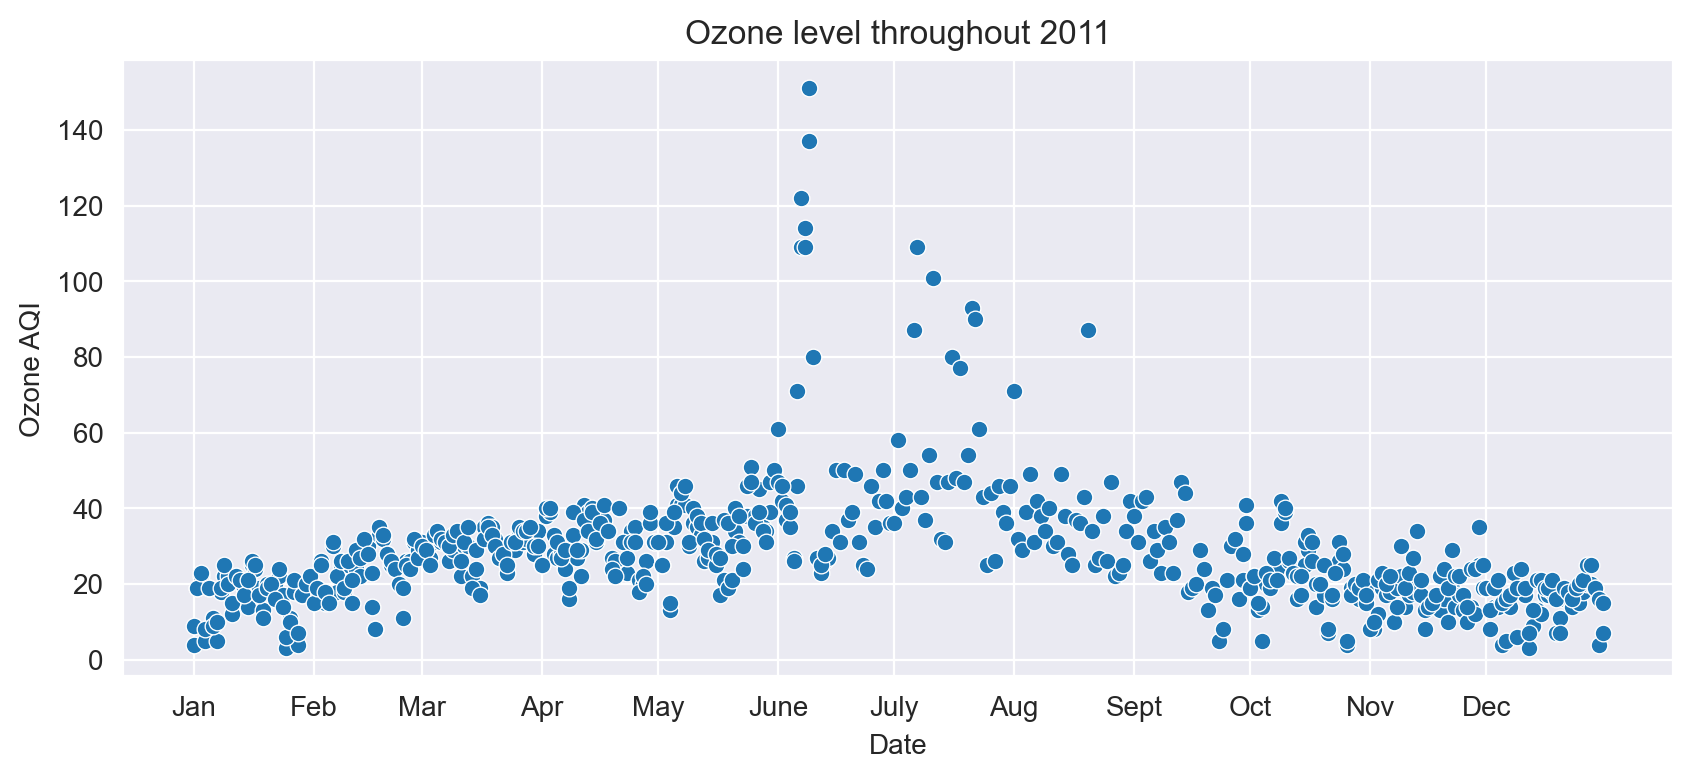

In [ ]:
# e.g., does Ozone level change over the years?

# step 1: declare figure using plt.subplots
fig, ax = 

# step 2: plot with seaborn
sns.

# step 3: set labels, titles, add other elements (e.g., text)
ax.set_xlabel('_')
ax.set_ylabel('_')
ax.set_title('_')

# step 4: save figure
plt.savefig("filename.png")

### Challenge Problem (Optional)

In [ ]:
# we want to understand how NO2 changes overtime in 2011
# (suboptimal) example
nyc_2011 = nyc[nyc['Date Local'] <= '2011-12-31']
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.lineplot(x = 'Date Local', 
            y = 'NO2 AQI', 
            data = nyc_2011, 
            ax = ax) 

What is not great about the visualization above? 

In [ ]:
# declare figure
fig, ax = plt.subplots(1, 1, figsize=(10,4), dpi = 200)

# line plot
sns.lineplot(x = 'Date Local', 
            y = 'NO2 AQI', 
            data = nyc_2011, 
            label = "NO2 AQI",
            ax = ax) 

pos = ['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',  
       '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', 
       '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01'] 
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',  
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 

# rename x-ticks
plt.xticks(pos, lab) 
plt.title("NO2 AQI By Month in 2011")

In [ ]:
nyc_2011['rolling_avg'] = nyc_2011['NO2 AQI'].rolling(30).mean() 
# declare figure
fig, ax = plt.subplots(1, 1, figsize=(10,4), dpi = 200)

# line plot
sns.lineplot(x = 'Date Local', 
            y = 'NO2 AQI', 
            data = nyc_2011, 
            label = "NO2 AQI",
            ax = ax) 

# line plot w/ rolling
sns.lineplot(x = 'Date Local', 
            y = 'rolling_avg', 
            data = nyc_2011, 
            label = "monthly avg",
            ax = ax) 

# rename x-ticks
pos = ['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',  
       '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', 
       '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01'] 
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',  
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
  
plt.xticks(pos, lab) 

# set title
plt.title("NO2 AQI By Month in 2011")

# save figure
plt.savefig("EDA-results/no2_time_series_2011.png")
# if using Google colab, uncomment:
# files.download('filename.png')